In [179]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
# dtype = torch.float
# #device = torch.device("cpu")
# device = torch.device("cuda:0")
# torch.set_default_tensor_type('torch.cuda.FloatTensor')
import NeuralNetwork as NN
import Layer
import importlib
import time
from IPython.display import display
from ipywidgets import FloatProgress

importlib.reload(NN)
importlib.reload(Layer);

In [180]:
net = NN.NeuralNetwork()
l = Layer.InputPELayer(n=2)
net.AddLayer(l)
#net.AddLayer(Layer.PELayer(n=2))
net.AddLayer(Layer.PELayer(n=2))
net.AddLayer(Layer.TopPELayer(n=2))

In [181]:
net.SetIdentityWeights()
net.M[0] += torch.normal( mean=torch.zeros_like(net.M[0]) )/2.

In [51]:
net.learn = False
net.learn_weights = False
net.learn_biases = False

In [182]:
net.learn = True
net.learn_weights = True
net.learn_biases = True
net.beta = 1.

In [183]:
net.ShowBias()

  b = [0. 0.]
  b = [0. 0.]
  b = [0. 0.]


In [184]:
net.ShowWeights()

  W01 = 
[[1. 0.]
 [0. 1.]]
  M10 = 
[[ 1.4463125   0.21090429]
 [-0.24500804  1.0238523 ]]
  W12 = 
[[1. 0.]
 [0. 1.]]
  M21 = 
[[1. 0.]
 [0. 1.]]


In [205]:
net.ShowBias()
net.ShowWeights()

  b = [ 0.00456009 -0.00289007]
  b = [0. 0.]
  b = [0. 0.]
  W01 = 
[[ 1.110659   -0.04119455]
 [ 0.03494012  1.0178635 ]]
  M10 = 
[[ 1.110659    0.03494012]
 [-0.04119455  1.0178635 ]]
  W12 = 
[[1. 0.]
 [0. 1.]]
  M21 = 
[[1. 0.]
 [0. 1.]]


In [258]:
net.layers[-1].beta = 1.
epochs = 100
fp = FloatProgress(min=0,max=epochs)  
display(fp)
T = 4
start_time = time.time()
for k in range(epochs):
    x = np.random.rand()*0.25 - 0.125
    y = np.random.rand()*0.25 - 0.125
    net.SetInput([x,y])
    net.SetExpectation([x,y])
    #print(k, x,y)
    net.Run(T, dt=0.01)
    fp.value += 1
end_time = time.time()
print('Total time: '+str(end_time-start_time))

A Jupyter Widget

Total time: 8.112243175506592


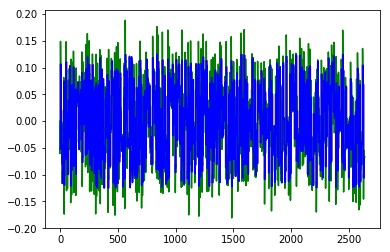

In [203]:
lastn = -50*1000
lastn = 0
plt.plot(np.array(net.t_history[lastn:]), np.array(net.layers[0].v_history)[lastn:,0], 'r',
         np.array(net.t_history[lastn:]), np.array(net.layers[1].v_history)[lastn:,0], 'g',
         np.array(net.t_history[lastn:]), np.array(net.layers[2].v_history)[lastn:,0], 'b');

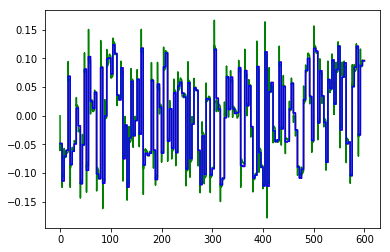

In [194]:
plt.plot(np.array(net.t_history[lastn:]), np.array(net.layers[0].v_history)[lastn:,1], 'r',
         np.array(net.t_history[lastn:]), np.array(net.layers[1].v_history)[lastn:,1], 'g',
         np.array(net.t_history[lastn:]), np.array(net.layers[2].v_history)[lastn:,1], 'b');

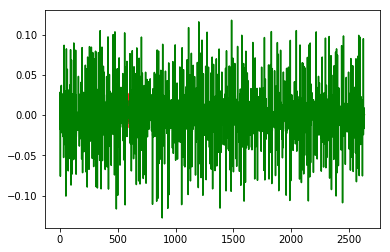

In [204]:
plt.plot(np.array(net.t_history[lastn:]), np.array(net.layers[0].e_history)[lastn:,0], 'r',
         np.array(net.t_history[lastn:]), np.array(net.layers[1].e_history)[lastn:,0], 'g');
#plt.ylim([-0.01,0.01])

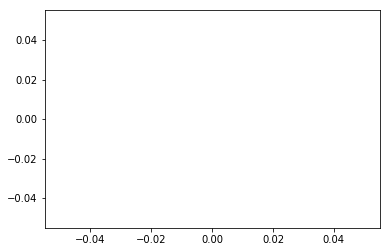

In [196]:
plt.plot(np.array(net.t_history[:-lastn]), np.array(net.layers[0].e_history)[:-lastn,0], 'r',
         np.array(net.t_history[:-lastn]), np.array(net.layers[1].e_history)[:-lastn,0], 'g');
#plt.ylim([-0.01,0.01])

In [259]:
net.ShowBias()
net.ShowWeights()

  b = [ 0.00051919 -0.00017059]
  b = [0. 0.]
  b = [0. 0.]
  W01 = 
[[ 1.0337831  -0.00499693]
 [ 0.00870747  1.0179343 ]]
  M10 = 
[[ 1.0337831   0.00870747]
 [-0.00499693  1.0179343 ]]
  W12 = 
[[1. 0.]
 [0. 1.]]
  M21 = 
[[1. 0.]
 [0. 1.]]


In [260]:
net.SetInput([0.1, -0.05])
net.layers[-1].beta = 0.
net.ShowState()

Layer 0 (input):
  v = [ 0.1  -0.05]
  e = [-0.00048249  0.00075836]
Layer 1:
  v = [ 0.02805261 -0.06863406]
  e = [-0.00050894  0.00077434]
Layer 2 (expectation):
  v = [ 0.0285625  -0.06950988]


In [266]:
net.Run(2., dt=0.001)
net.ShowState()
net.ShowBias()

Layer 0 (input):
  v = [ 0.1  -0.05]
  e = [1.0375033e-05 3.3485351e-06]
Layer 1:
  v = [ 0.0937753  -0.04946873]
  e = [5.2593095e-06 1.7240734e-06]
Layer 2 (expectation):
  v = [ 0.09404602 -0.04951092]
  b = [0.00371981 0.00076917]
  b = [0. 0.]
  b = [0. 0.]


In [212]:
net.M[-1]@Layer.tanh(net.layers[-1].v) + net.layers[-2].b

tensor([ 0.0775,  0.1026])

In [158]:
net.M[-1]

tensor([[ 1.,  0.],
        [ 0.,  1.]])